<a href="https://colab.research.google.com/github/mrigankapaul-dhubri/TXTA_Praxis_term2/blob/main/A21019_MrigankaPaul_TXTA_assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Name - Mriganka Paul**

**Roll No- A21019**

**TXTA Assignment** 

In [3]:
from google.colab import files
uploaded = files.upload()

Saving A21--19.csv to A21--19.csv


In [4]:
import pandas as pd
import numpy as np


import os, re
from wordcloud import WordCloud, STOPWORDS
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from collections import Counter

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.express as px

In [5]:
data = pd.read_csv("A21--19.csv") #reading the csv file and assigning it to a variable "data"

In [6]:
data.head() #reading the first 5 rows of the data

,Title,Heading,Reviewer,Date,Review,Bank,Rating
0,Saving Account,Easy to access and branch experience is good,VLJ,2019-07-13,Every transactions are going smoothly with my ...,Axis Bank,4.0
1,Personal Loan,You can bank on Axis bank any time,JADHAV,2019-07-13,I have not provided any documents and straight...,Axis Bank,4.0
2,Credit Card,Easy to access the axis bank,LAKSHMIKANTH,2019-07-13,Axis bank given me a personal loan based on my...,Axis Bank,4.0
3,Saving Account,Excellent service,L,2019-07-13,My salary account is with Axis Bank. There is ...,Axis Bank,5.0
4,Personal Loan,Good,SE,2019-07-13,I was eligible for Axis bank Personal Loan and...,Axis Bank,4.0


In [7]:
data.tail() #reading the last 5 rows of the data

,Title,Heading,Reviewer,Date,Review,Bank,Rating
4964,Saving Account,Savings Account,Paridhi Chauhan,2014-11-05,I have very good banking experience with them ...,Indian-Bank,4.0
4965,Saving Account,Savings Account,Paridhi Chauhan,2014-11-05,I have very good banking experience with them ...,Indian-Bank,4.0
4966,Home Loan,Excellent support,BALAMURUGAN MANOGARAN,2014-11-03,Indian bank services in terms of home loan is ...,Indian-Bank,4.0
4967,Saving Account,Branch services must be improvised,JANARDHANAN SN,2014-10-30,Indian bank services in terms of savings accou...,Indian-Bank,3.0
4968,Education Loan,Grate service,Karthikeyan Annamalai,2014-10-26,There are lot of unknowns when it comes to the...,Indian-Bank,3.5


In [8]:
data.shape #looking into the shape and we understand from the output is that we have 7 features and 4969 records

(4969, 7)

In [9]:
data.columns #checking the feature names

Index(['Title', 'Heading', 'Reviewer', 'Date', 'Review', 'Bank', 'Rating'], dtype='object')

In [10]:
data.info() #checking the datatypes of the columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4969 entries, 0 to 4968
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Title     4969 non-null   object 
 1   Heading   4969 non-null   object 
 2   Reviewer  4969 non-null   object 
 3   Date      4969 non-null   object 
 4   Review    4969 non-null   object 
 5   Bank      4969 non-null   object 
 6   Rating    4969 non-null   float64
dtypes: float64(1), object(6)
memory usage: 271.9+ KB


In [11]:
data.describe(include = 'object') #this also shows that there is Null values

,Title,Heading,Reviewer,Date,Review,Bank
count,4969,4969,4969,4969,4969,4969
unique,14,1264,3820,1033,4815,5
top,Saving Account,Good service,S,2019-06-12,I got the UNION BANK OF INDIA savings account ...,Union-Bank-Of-India
freq,3453,533,15,41,3,1000


In [12]:
data.describe() #this also shows that there is Null values

,Rating
count,4969.000000
mean,4.098209
std,1.011217
min,0.500000
25%,3.500000
50%,4.000000
75%,5.000000
max,5.000000


In [13]:
data["Bank"].value_counts() #checking how many Bank's data do we have

Union-Bank-Of-India     1000
Punjab-National-Bank    1000
IDBI-Bank               1000
Indian-Bank             1000
Axis Bank                969
Name: Bank, dtype: int64

In [14]:
data["Title"].value_counts() #checking what are the different titles present in the data

Saving Account           3453
Credit Card               626
Home Loan                 300
Personal Loan             189
Other Loan                 88
Current Account            72
Education Loan             70
Car Loan                   69
Fixed Deposit              47
Recurring Deposit          27
All Products               12
Two Wheeler Loan           11
Loan Against Property       4
Life Insurance              1
Name: Title, dtype: int64

In [15]:
data.Title.nunique() #there are 14 unique titles in total

14




*Title field must have a dropdown or checkbox type of field where reviewers had to select from the given option and not a editable field*





 .

In [16]:
data["Heading"].value_counts()  #This must have been an editable field and not a dropdown field

Good service                                                533
Good                                                        269
Good Service                                                202
Excellent                                                   160
Good banking service                                        142
                                                           ... 
Not good...                                                   1
A traditional banker who requires continuous improvement      1
Best option for the economic people                           1
Banking Services Are Good...                                  1
Grate service                                                 1
Name: Heading, Length: 1264, dtype: int64

In [17]:
data.Rating.value_counts() #The ratings seems to be was rated between 1 to 5 having an interval of 0.5

5.0    2097
4.0    1458
3.0     716
2.0     208
4.5     171
3.5     135
1.0     126
2.5      39
0.5      11
1.5       8
Name: Rating, dtype: int64

In [18]:
data.Rating.nunique()

10

In [19]:
data["Date"].value_counts()

2019-06-12    41
2019-06-23    40
2019-07-11    37
2019-05-13    35
2019-06-11    35
              ..
2017-05-23     1
2017-05-20     1
2017-05-16     1
2017-05-14     1
2014-10-26     1
Name: Date, Length: 1033, dtype: int64

In [20]:
data["Date"][0:4]

0    2019-07-13
1    2019-07-13
2    2019-07-13
3    2019-07-13
Name: Date, dtype: object

In [21]:
data['Date_year'] = data['Date'].str.slice(0, 4) #created a new column named "Date_year" to capture only the year from the given date in the data frame

In [22]:
data.head()

,Title,Heading,Reviewer,Date,Review,Bank,Rating,Date_year
0,Saving Account,Easy to access and branch experience is good,VLJ,2019-07-13,Every transactions are going smoothly with my ...,Axis Bank,4.0,2019
1,Personal Loan,You can bank on Axis bank any time,JADHAV,2019-07-13,I have not provided any documents and straight...,Axis Bank,4.0,2019
2,Credit Card,Easy to access the axis bank,LAKSHMIKANTH,2019-07-13,Axis bank given me a personal loan based on my...,Axis Bank,4.0,2019
3,Saving Account,Excellent service,L,2019-07-13,My salary account is with Axis Bank. There is ...,Axis Bank,5.0,2019
4,Personal Loan,Good,SE,2019-07-13,I was eligible for Axis bank Personal Loan and...,Axis Bank,4.0,2019


In [23]:
data.Date_year.value_counts() #here we can understand the given data has records from year 2014 to 2019

2019    1915
2018    1376
2017    1021
2015     407
2016     236
2014      14
Name: Date_year, dtype: int64

In [24]:
#droping the Reviewer and Date column as these two columns wont be much helpful for my analysis
data_new = data.copy()
data_new.drop(['Reviewer','Date'], axis=1, inplace=True)
data_new.head()

,Title,Heading,Review,Bank,Rating,Date_year
0,Saving Account,Easy to access and branch experience is good,Every transactions are going smoothly with my ...,Axis Bank,4.0,2019
1,Personal Loan,You can bank on Axis bank any time,I have not provided any documents and straight...,Axis Bank,4.0,2019
2,Credit Card,Easy to access the axis bank,Axis bank given me a personal loan based on my...,Axis Bank,4.0,2019
3,Saving Account,Excellent service,My salary account is with Axis Bank. There is ...,Axis Bank,5.0,2019
4,Personal Loan,Good,I was eligible for Axis bank Personal Loan and...,Axis Bank,4.0,2019


### **Analysis Question 1 : Which bank rating was the best in all the years**

In [25]:
rank_overall_bank = data_new[['Bank','Rating']]
rank_overall_bank = rank_overall_bank.groupby('Bank', as_index = False).mean()
rank_overall_bank 
# We are taking out the average rating of all the banks for all the years present in the data

,Bank,Rating
0,Axis Bank,4.373581
1,IDBI-Bank,4.162500
2,Indian-Bank,3.917000
3,Punjab-National-Bank,4.014000
4,Union-Bank-Of-India,4.032500


In [26]:
fig = px.bar(rank_overall_bank, x='Bank', y='Rating',title= "Overall average rating of banks from year 2014 to 2019")
fig.show()

We can see that Axis Bank has the best average rating overall in the last 5 years i.e. from 2014 to 2019

.

## **Anslysis Question 2: Year wise best average rating of banks**

In [27]:
rating_year_wise = data_new[['Bank','Rating', 'Date_year']]
rating_year_wise = rating_year_wise.groupby(['Date_year','Bank'], as_index = False).mean()

rating_year_wise.sort_index(axis = 0) 

,Date_year,Bank,Rating
0,2014,Indian-Bank,4.071429
1,2015,Indian-Bank,3.836585
2,2015,Union-Bank-Of-India,3.581683
3,2016,IDBI-Bank,4.562500
4,2016,Indian-Bank,3.822115
5,2016,Union-Bank-Of-India,3.995690
6,2017,IDBI-Bank,4.197613
7,2017,Indian-Bank,3.930180
8,2017,Punjab-National-Bank,3.981328
9,2017,Union-Bank-Of-India,4.229282


In [28]:
rating_year_2014 = rating_year_wise[rating_year_wise['Date_year'] == '2014'] #taking out the records which belong to year 2014

In [29]:
rating_year_2014

,Date_year,Bank,Rating
0,2014,Indian-Bank,4.071429


So for year 2014, we only have records for "Indian-Bank"

In [30]:
rating_year_2015 = rating_year_wise[rating_year_wise['Date_year'] == '2015'] #taking out the records which belong to year 2015
rating_year_2015

,Date_year,Bank,Rating
1,2015,Indian-Bank,3.836585
2,2015,Union-Bank-Of-India,3.581683


In [31]:
review_count_year_wise = data_new[['Date_year', 'Bank', 'Rating']]
review_count_year_wise = review_count_year_wise.groupby(['Date_year','Bank'], as_index = False).count()

In [32]:
review_count_year_2015 = review_count_year_wise[review_count_year_wise['Date_year'] == '2015'] #taking out the count of ratings for each bank for year 2015
fig = px.bar(review_count_year_2015, x='Bank', y='Rating',title= "Count of ratings for each bank for year 2015")
fig.show()

In [33]:
fig = px.bar(rating_year_2015, x='Bank', y='Rating',title= "Average rating of banks for year 2015")
fig.show()

So we can see that for year 2015 we only have records of "Indian-Bank" and "Union-Bank-Of-India". And in that year "Indian-Bank" had better average rating from reviewers.

.

In [34]:
review_count_year_2016 = review_count_year_wise[review_count_year_wise['Date_year'] == '2016'] #taking out the count of ratings for each bank for year 2016
fig = px.bar(review_count_year_2016, x='Bank', y='Rating',title= "Count of ratings for each bank for year 2016")
fig.show()

In [35]:
rating_year_2016 = rating_year_wise[rating_year_wise['Date_year'] == '2016'] #taking out the records which belong to year 2016
fig = px.bar(rating_year_2016, x='Bank', y='Rating',title= "Average rating of banks for year 2016")
fig.show()

So we can see that for year 2016 "IDBI-Bank" has better rating than "Indian-Bank" and "Union-Bank-Of-India". And also a noticable point is that "Union-Bank-Of-India" ratings are better than "Indian-Bank" in 2016 which was the opposite in 2015.

.

In [36]:
review_count_year_2017 = review_count_year_wise[review_count_year_wise['Date_year'] == '2017'] #taking out the count of ratings for each bank for year 2017
fig = px.bar(review_count_year_2017, x='Bank', y='Rating',title= "Count of ratings for each bank for year 2017")
fig.show()

In [37]:
rating_year_2017 = rating_year_wise[rating_year_wise['Date_year'] == '2017'] #taking out the records which belong to year 2017
fig = px.bar(rating_year_2017, x='Bank', y='Rating',title= "Average rating of banks for year 2017")
fig.show()

In year 2017, "Union-Bank-Of-India" has the best rating of all the other 3 banks rating present for the year. And "Indian-Bank" was the lowest among the ratings.

.

In [38]:
review_count_year_2018 = review_count_year_wise[review_count_year_wise['Date_year'] == '2018'] #taking out the count of ratings for each bank for year 2018
fig = px.bar(review_count_year_2018, x='Bank', y='Rating',title= "Count of ratings for each bank for year 2018")
fig.show()

In [39]:
rating_year_2018 = rating_year_wise[rating_year_wise['Date_year'] == '2018'] #taking out the records which belong to year 2018
fig = px.bar(rating_year_2018, x='Bank', y='Rating',title= "Average rating of banks for year 2018")
fig.show()

In year 2018, "IDBI-Bank" has the best rating of all the other 3 banks rating present for the year. And "Indian-Bank" was the lowest among the ratings.

.

In [40]:
review_count_year_2019 = review_count_year_wise[review_count_year_wise['Date_year'] == '2019'] #taking out the count of ratings for each bank for year 2019
fig = px.bar(review_count_year_2019, x='Bank', y='Rating',title= "Count of ratings for each bank for year 2019")
fig.show()

In [41]:
rating_year_2019 = rating_year_wise[rating_year_wise['Date_year'] == '2019'] #taking out the records which belong to year 2019
fig = px.bar(rating_year_2019, x='Bank', y='Rating',title= "Average rating of banks for year 2019")
fig.show()

In year 2019, "Axis-Bank" has the best rating of all the other 4 banks rating present for the year. And "Indian-Bank" was the lowest among the ratings.



.



# **Analysis Question 3: Reviewer are more likely to give rating/review for which service of the banks(Title)**

In [42]:
service_rating = data_new[['Title', 'Bank', 'Review']]
service_rating = service_rating.groupby([service_rating['Bank'],service_rating['Title']], as_index = False).count()

In [43]:
for i in ['Axis Bank', 'IDBI-Bank', 'Indian-Bank', 'Punjab-National-Bank', 'Union-Bank-Of-India']:
  service_rating_each_bank = service_rating[service_rating['Bank'] == i] #checking the number of reviews for each service/title for Axis bank in all the years
  title_rate = "Number of reviews for each service/title for " + i + " bank in all the years"
  fig = px.bar(service_rating_each_bank, x='Title', y='Review',title= title_rate)
  fig.show()

Points to be noted from the analysis-


*   Axis Bank's main service is in Credit card and Savings Account.
*   IDBI Bank, Indian-Bank, Punjab-National-Bank, Union-Bank-Of-India main service is in Savings Account.
*   Except Axis Bank no other bank focuses much on the credit card service.
*   The number of service provided by the Axis Bank is much lesser than other banks. This is happening may be because the Axis Bank has started in 2019(we are thinking it as there is no data of Axis Bank previous to 2019)
*   Other banks except Axis are focusing only on the Saving Account service where as for Axis Bank it is little spreaded over the services and not fully concentrated on one service





.

# **Analysis Question 4: Saving Account service is better in which of the banks as per the review data**

In [44]:
saving_account_performance = data_new[['Title', 'Bank', 'Rating']]
saving_account_performance = saving_account_performance.groupby([saving_account_performance['Title'],saving_account_performance['Bank']], as_index = False).mean()


In [45]:
saving_account_performance = saving_account_performance[saving_account_performance['Title'] == 'Saving Account']

In [46]:
saving_account_performance.head()

,Title,Bank,Rating
48,Saving Account,Axis Bank,4.419437
49,Saving Account,IDBI-Bank,4.156173
50,Saving Account,Indian-Bank,3.863636
51,Saving Account,Punjab-National-Bank,3.966113
52,Saving Account,Union-Bank-Of-India,4.069620


In [47]:
fig = px.bar(saving_account_performance, x='Bank', y='Rating',title= "Average rating of the banks for the Saving Account service")
fig.show()

The average rating of Axis Bank is the highest for the Saving Account service but the number of reviews are near to half of what other banks have. So among the other banks IDBI Bank's review is the best for the Saving Account service

.

# **Aanalysis Question 5: Want to see the different ratings bank has received and the count of those ratings**

In [48]:
count_rating = data_new[['Bank', 'Rating', 'Review']]
count_rating = count_rating.groupby([count_rating['Bank'],count_rating['Rating']],as_index = False).count() #count of reviews for each rating for each of the banks

In [49]:
count_rating.head()

,Bank,Rating,Review
0,Axis Bank,1.0,16
1,Axis Bank,2.0,16
2,Axis Bank,2.5,4
3,Axis Bank,3.0,76
4,Axis Bank,3.5,20


In [50]:
for i in ['Axis Bank', 'IDBI-Bank', 'Indian-Bank', 'Punjab-National-Bank', 'Union-Bank-Of-India']:
  title_rate = "Count of reviews for each of the ratings for " + i
  count_rating_bankwise = count_rating[count_rating['Bank'] == i]
  fig = px.bar(count_rating_bankwise, x='Rating', y='Review',title= title_rate)
  fig.show()

For all the banks, most of the reviewer have chosen rating one among 3,4 and 5.


.

# **Analysis Question 6: Which are the most 60 common words being used in Review for each of the banks**

Most common 60 words used in Review for Axis Bank
Most common 60 words used in Review for IDBI-Bank
Most common 60 words used in Review for Indian-Bank
Most common 60 words used in Review for Punjab-National-Bank
Most common 60 words used in Review for Union-Bank-Of-India


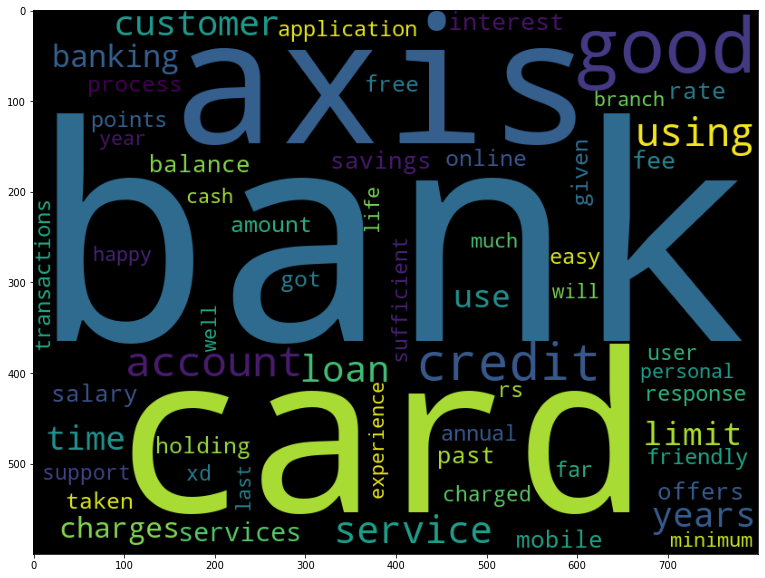

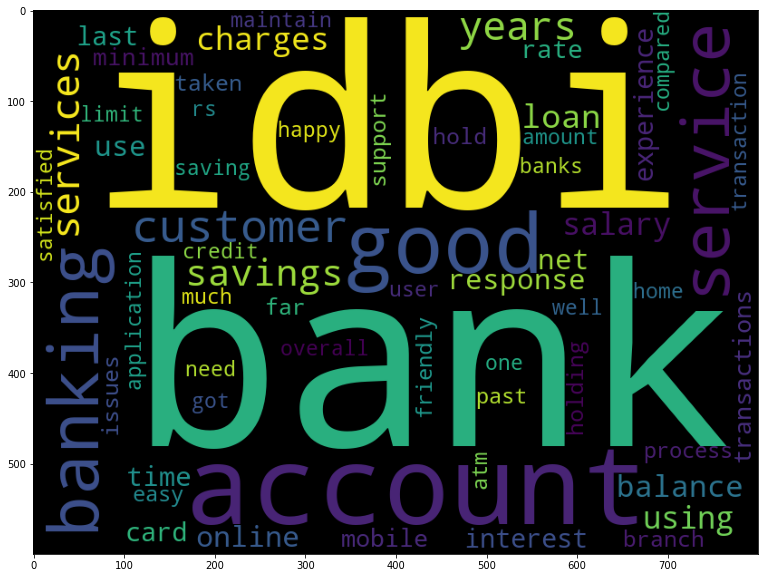

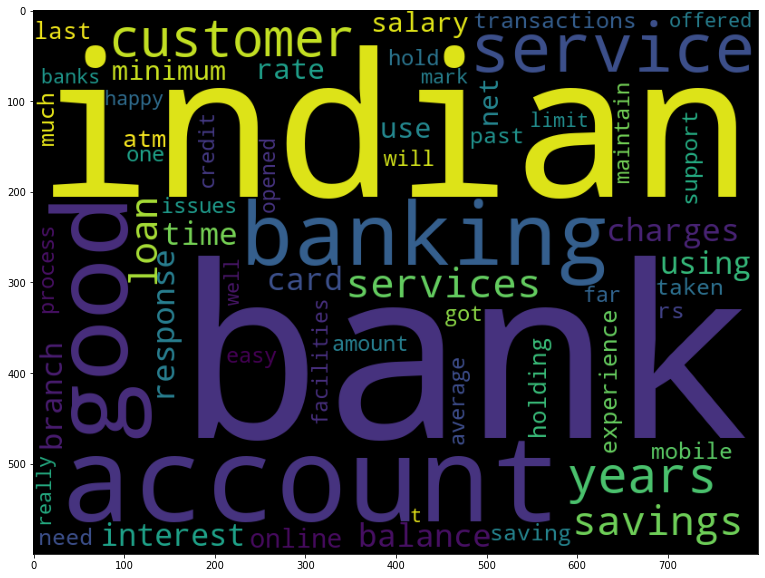

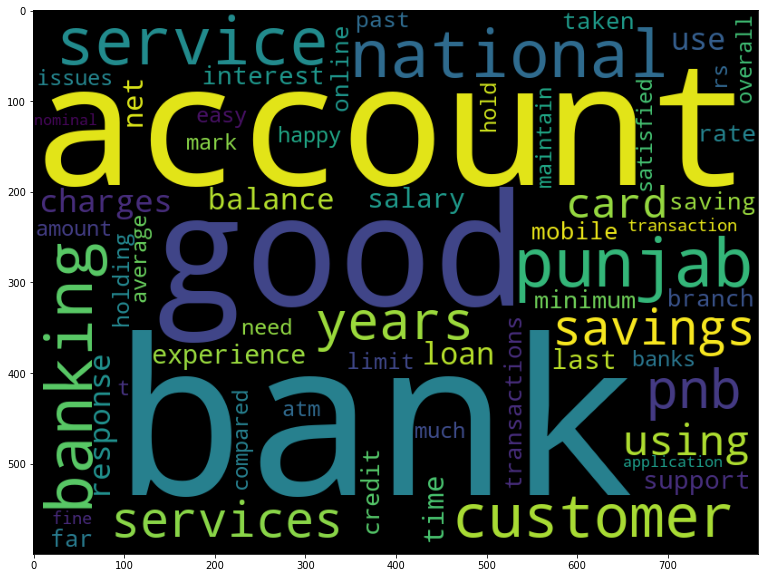

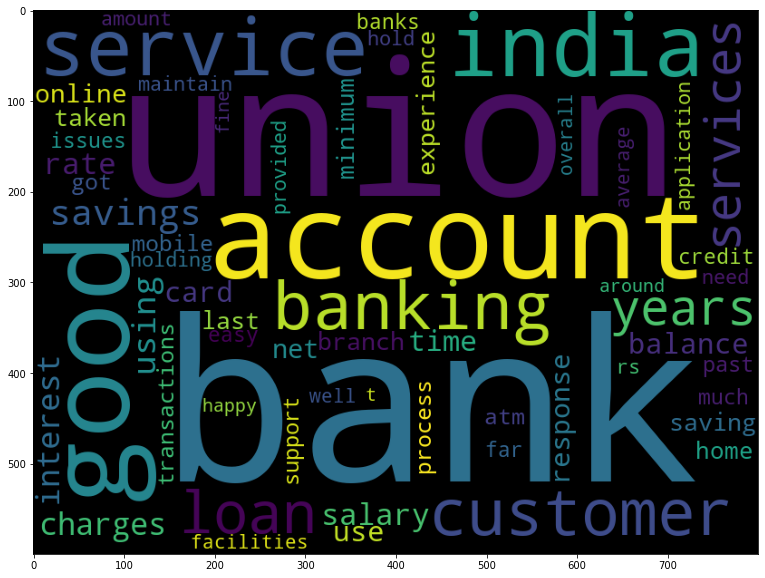

In [52]:
for i in ['Axis Bank', 'IDBI-Bank', 'Indian-Bank', 'Punjab-National-Bank', 'Union-Bank-Of-India']:
  only_review = data_new['Review'][data_new['Bank'] == i]

  corpus_review = [re.sub("\\n\\n", " ", s) for s in only_review]  #to substitute all "\\n\\n" present in the data with a space.
  corpus_review = [x.lower() for x in corpus_review] #to convert all the text into small characters
  corpus_review = [re.sub("[^a-z' ]+", "", x) for x in corpus_review] #to substitute anything other than "a-z" and "'" and a space with nothing
  corpus_review = [x.strip() for x in corpus_review] #to delete the spaces from the front and end of each index

  single_text_review = " ".join(corpus_review) #converting all the reviews into one single text

  tokens_review = re.findall("\w+",single_text_review)

  tokens_review_no_stopwords = [x for x in tokens_review if x not in STOPWORDS]

  c_review = Counter(tokens_review_no_stopwords)
  wc = WordCloud(width = 800, height = 600, stopwords = STOPWORDS)

  most_review_words = {k:v for k,v in c_review.most_common(60)}

  plt.figure(figsize = (15,10))
  plt.title = "Most common 60 words used in Review for " + i
  print(plt.title)
  plt.imshow(wc.generate_from_frequencies(most_review_words))

.

# **Analysis Question 7: Create a model to predict the Title using the words used in the Review**

In [53]:
data_new.drop(data_new[data_new['Title'] == "Life Insurance"].index, inplace = True) #droping this record as for "Life Insurance" we only have one record

In [54]:
data_new.head()

,Title,Heading,Review,Bank,Rating,Date_year
0,Saving Account,Easy to access and branch experience is good,Every transactions are going smoothly with my ...,Axis Bank,4.0,2019
1,Personal Loan,You can bank on Axis bank any time,I have not provided any documents and straight...,Axis Bank,4.0,2019
2,Credit Card,Easy to access the axis bank,Axis bank given me a personal loan based on my...,Axis Bank,4.0,2019
3,Saving Account,Excellent service,My salary account is with Axis Bank. There is ...,Axis Bank,5.0,2019
4,Personal Loan,Good,I was eligible for Axis bank Personal Loan and...,Axis Bank,4.0,2019


In [55]:
only_review = data_new['Review']

In [56]:
corpus_review = [re.sub("\\n\\n", " ", s) for s in only_review]  #to substitute all "\\n\\n" present in the data with a space.
corpus_review = [x.lower() for x in corpus_review] #to convert all the text into small characters
corpus_review = [re.sub("[^a-z' ]+", "", x) for x in corpus_review] #to substitute anything other than "a-z" and "'" and a space with nothing
corpus_review = [x.strip() for x in corpus_review] #to delete the spaces from the front and end of each index

In [57]:
tfidf = TfidfVectorizer(stop_words = STOPWORDS, ngram_range= (1,2), max_df = 0.7, min_df = 30, max_features = 600, token_pattern="[a-z']+")

In [58]:
tfidf_mat = tfidf.fit_transform(corpus_review)
tfidf_mat

<4968x600 sparse matrix of type '<class 'numpy.float64'>'
	with 132770 stored elements in Compressed Sparse Row format>

In [59]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import cohen_kappa_score, make_scorer

In [60]:
def kappa_score(y_act, y_pred):
  return cohen_kappa_score(y_act, y_pred)

kappa = make_scorer(kappa_score)

In [61]:
lr = LogisticRegression(max_iter = 1000)

In [62]:
cross_val_score(lr, X= tfidf_mat, y = data_new.Title, cv = 4, scoring = kappa)

array([0.82769453, 0.82869896, 0.84931451, 0.85111956])

the kappa score for the Logistic Regression is more than 80% which is a very good score, so we can go with this model.

In [63]:
#the model 
model = LogisticRegression(random_state=101, solver='lbfgs',multi_class='multinomial',max_iter = 1000) 

In [64]:
#fitting the model
model.fit(tfidf_mat, data_new.Title)

LogisticRegression(max_iter=1000, multi_class='multinomial', random_state=101)

# **Analysis Question 8: Create a model to predict the rating using the words in the Review**

In [86]:
new_data_model = data_new.copy()

In [88]:
conditions = [
    (new_data_model['Rating'] > 4),
    (new_data_model['Rating'] > 2) & (new_data_model['Rating'] < 5),
    (new_data_model['Rating'] < 3 )
    ]

values = ['High', 'Medium', 'Low']
new_data_model['Rating'] = np.select(conditions, values) #changing the values of Rating column to "High", "Medium" and "Low"

#code refered from https://www.dataquest.io/blog/tutorial-add-column-pandas-dataframe-based-on-if-else-condition/

In [89]:
new_data_model.head()

,Title,Heading,Review,Bank,Rating,Date_year
0,Saving Account,Easy to access and branch experience is good,Every transactions are going smoothly with my ...,Axis Bank,Medium,2019
1,Personal Loan,You can bank on Axis bank any time,I have not provided any documents and straight...,Axis Bank,Medium,2019
2,Credit Card,Easy to access the axis bank,Axis bank given me a personal loan based on my...,Axis Bank,Medium,2019
3,Saving Account,Excellent service,My salary account is with Axis Bank. There is ...,Axis Bank,High,2019
4,Personal Loan,Good,I was eligible for Axis bank Personal Loan and...,Axis Bank,Medium,2019


In [90]:
new_data_model.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4968 entries, 0 to 4968
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Title      4968 non-null   object
 1   Heading    4968 non-null   object
 2   Review     4968 non-null   object
 3   Bank       4968 non-null   object
 4   Rating     4968 non-null   object
 5   Date_year  4968 non-null   object
dtypes: object(6)
memory usage: 271.7+ KB


In [91]:
only_review_rating = new_data_model['Review']

In [92]:
corpus_review_rating = [re.sub("\\n\\n", " ", s) for s in only_review_rating]  #to substitute all "\\n\\n" present in the data with a space.
corpus_review_rating = [x.lower() for x in corpus_review_rating] #to convert all the text into small characters
corpus_review_rating = [re.sub("[^a-z' ]+", "", x) for x in corpus_review_rating] #to substitute anything other than "a-z" and "'" and a space with nothing
corpus_review_rating = [x.strip() for x in corpus_review_rating] #to delete the spaces from the front and end of each index

In [98]:
tfidf_rating = TfidfVectorizer(stop_words = STOPWORDS, ngram_range= (1,3), max_df = 0.7, min_df = 30, max_features = 600, token_pattern="[a-z']+")

In [99]:
tfidf_mat_rating = tfidf_rating.fit_transform(corpus_review_rating)

In [100]:
cross_val_score(lr, X= tfidf_mat_rating, y = new_data_model.Rating, cv = 4, scoring = kappa)

array([ 0.10115038, -0.07072413,  0.02810116,  0.13816488])

kappa score is pretty less for the logistic regression. This model wont be a good one.

In [101]:
from sklearn.ensemble import RandomForestClassifier

In [102]:
rf = RandomForestClassifier(n_estimators=500)

In [103]:
cross_val_score(rf, X = tfidf_mat_rating, y = new_data_model.Rating, cv = 4, scoring = kappa)

array([ 0.06427806, -0.09557003, -0.04889524,  0.17948347])

kappa score for Random Forest also seems to be very less and so wont be a good idea to go with this model.

-----------END--------------